# Laboratorio 3: Detección de movimiento y tracking

**Parte 1:** Detección de movimiento con diferencia de frames y modelo de fondo 

1.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import scandir
import matplotlib.pyplot as plt

Se creó el detector de movimiento por diferencia de cuadros

In [19]:
def detector(seq):
    direct= 'C:/Users/aleja/Desktop/exp3/'+ seq + '/'
    ims_names = [im.name for im in scandir(direct)] #se listan los nombres de las imagenes del directorio
    ims_names = sorted(ims_names) #se ordenan alfabeticamente
    frame_width = 1280
    frame_height = 800
    out = cv2.VideoWriter('out'+seq+'.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                          (frame_width,frame_height),
                          isColor = False)

    #dif = []
    
        
    for j, im in enumerate(ims_names[:-1]):
        im1 = cv2.imread(direct + im,0)
        im2 = cv2.imread(direct + ims_names[j+1],0)
        diff = cv2.absdiff(im1, im2)
        blur = cv2.GaussianBlur(diff, (5,5), 0)
        _, thresh = cv2.threshold(blur, 25, 255, cv2.THRESH_BINARY)
        
    
        out.write(thresh)
        #out.write(np.uint8(im1))
        
    out.release()



In [20]:
detector('seq1')
detector('seq2')
detector('seq3')

Como resultado, se apreció que los pixeles en primer plano que estaban en movimiento, se les detectaba el entorno principalmente, llegando a estar los objetos detectados con un entorno blanco, con lo cual se puede distinguir que es el objeto que se esta detectando.

2.

In [25]:
class averaging_background:
    
    def __init__(self, alpha):
        self.alpha = alpha
        
    def fit(self, background_images):
        self.X = background_images.mean(axis = 0)
        self.D = 1 + background_images.std(axis = 0)
        
    def differencing(self,im):
        out1 = (im < self.X - self.alpha * self.D).astype(int) * 255
        out2 = (im > self.X + self.alpha * self.D).astype(int) * 255
        return out1 + out2

In [26]:
from os import scandir
import numpy as np
directory = 'seq4/fondo/'
ims_names = [im.name for im in scandir(directory)] #se listan los nombres de las imagenes del directorio
ims_names = sorted(ims_names) #se ordenan alfabeticamente

fondo = []
for im in ims_names:
    im1 = cv2.imread(directory + im,0)
    fondo.append(im1)
fondo = np.asarray(fondo)

In [27]:
avg_background = averaging_background(20)
avg_background.fit(fondo)

In [28]:
frame_width = 1280
frame_height = 800

out = cv2.VideoWriter('avg_diff_seq1.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 25, 
                      (frame_width,frame_height),
                      isColor = False)

directory = 'seq4/seq1/'
ims_names = [im.name for im in scandir(directory)] #se listan los nombres de las imagenes del directorio
ims_names = sorted(ims_names) #se ordenan alfabeticamente

for im in ims_names:
    im1 = cv2.imread(directory + im,0)
    r = avg_background.differencing(im1)
    out.write(np.uint8(r))

out.release()

3.

In [29]:
frame_width = 1280
frame_height = 800
threshold_h = frame_width * 3
threshold_v = frame_height * 3

out = cv2.VideoWriter('avg_bb_seq1.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 25, 
                      (frame_width,frame_height),
                      isColor = True)

directory = 'seq4/seq1/'
ims_names = [im.name for im in scandir(directory)] #se listan los nombres de las imagenes del directorio
ims_names = sorted(ims_names) #se ordenan alfabeticamente

for im in ims_names:
    im_color = cv2.imread(directory + im)
    im1 = cv2.cvtColor(im_color, cv2.COLOR_BGR2GRAY)

    r = avg_background.differencing(im1)
    c = r.sum(axis = 0) # suma de columnas
    f = r.sum(axis = 1) #suma de filas
    color = (255, 0, 0) 
    thickness = 2

    try:
        c = list(c > threshold_h)
        f = list(f > threshold_v)
        
        x_1 = c.index(True)
        c.reverse()
        x_2 = frame_width - c.index(True)
        y_1 = f.index(True)
        f.reverse()
        y_2 = frame_height - f.index(True)
        im_color = cv2.rectangle(im_color, (x_1, y_1), (x_2, y_2), color, thickness) 
    except:
        pass
    out.write(im_color)

out.release()



5.

La detección de movimiento logró captar a la persona, pero se enfoca mas en el contorno del objeto en movimiento, en este caso la persona, con lo cual los pixeles del contorno se vuelven blancos, adicionalmente, con el movimiento de la camara, se detectan ciertos pixeles en movimientos en el fondo, de objetos que no estan en movimiento, llegando a detectar movimiento erroneamente y volviendo los pixeles blancos de cosas estaticas.


In [33]:

#detector de movimiento
def detector5():
    direct= 'seq4/seq4/' + '/I_MC_01-'
    ims_names = []
    for i in range(300):
         ims_names.append(str(i+1)+'.bmp')
            
    frame_width = 352
    frame_height = 288
    out = cv2.VideoWriter('seq4.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                          (frame_width,frame_height),
                          isColor = False)

    
    for j in range(len(ims_names)-1):
        im1 = cv2.imread(direct + ims_names[j],0)
        im2 = cv2.imread(direct + ims_names[j+1],0)
        diff2 = cv2.absdiff(im1, im2)
        blur2 = cv2.GaussianBlur(diff2, (5,5), 0)
        _, thresh2 = cv2.threshold(blur2, 20, 255, cv2.THRESH_BINARY)
        #print(thresh2)
        
        
        out.write(thresh2)
        
        
    out.release()

In [34]:
detector5()

Los problemas que se lograron apreciar utilizando el detector por diferencia de cuadros, se basaron en el movimiento de la camara, puesto que la camara rotaba, lo que produjo ciertos errores, llegandose a detectar movimiento donde no lo existe, puesto que los frames de fondo cambiaban gracias al movimiento de la camara.

In [41]:

#detector con caja
def detector5a():
    direct= 'seq4/seq4/I_MC_01-'
    ims_names = []
    for i in range(300):
         ims_names.append(str(i+1)+'.bmp')
            
    frame_width = 352
    frame_height = 288
    out = cv2.VideoWriter('seq4caja.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 20, 
                          (frame_width,frame_height),
                          isColor = True)

    
    for j in range(len(ims_names)-1):
        im1 = cv2.imread(direct + ims_names[j])
        im2 = cv2.imread(direct + ims_names[j+1])
        diff2 = cv2.absdiff(im1, im2)
        gray2 = cv2.cvtColor(diff2, cv2.COLOR_BGR2GRAY)
        blur2 = cv2.GaussianBlur(gray2, (5,5), 0)
        _, thresh2 = cv2.threshold(blur2, 20, 255, cv2.THRESH_BINARY)
        dilated2 = cv2.dilate(thresh2, None, iterations=3)
        contours, _ = cv2.findContours(dilated2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print(thresh2)
        
        for contour in contours:
            (x, y, w, h) = cv2.boundingRect(contour)

            if cv2.contourArea(contour) < 500:
                continue
            cv2.rectangle(im1, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(im1, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                        1, (0, 0, 255), 3)
        image = cv2.resize(im1, (352,288))
        out.write(image)
        #cv2.imshow("feed", im1)
        #im1 = im2
        #ret, im2 = cap.read()

        
        
out.release()

In [42]:
detector5a()

#### Parte 2: Tracking de personas basado en Deep Learning.

1.

La red neuronal logra apreciar que es cada objeto resultando en:

In [38]:
direct= 'C:/Users/aleja/Desktop/Imagenes/'
ims_namesp2=[]
ims_namesp2 = [im.name for im in scandir(direct)] #se listan los nombres de las imagenes del directorio


In [39]:
imags=[]
for i in range(len(ims_namesp2)):
    imags.append(cv2.imread(direct+str(ims_namesp2[i])))

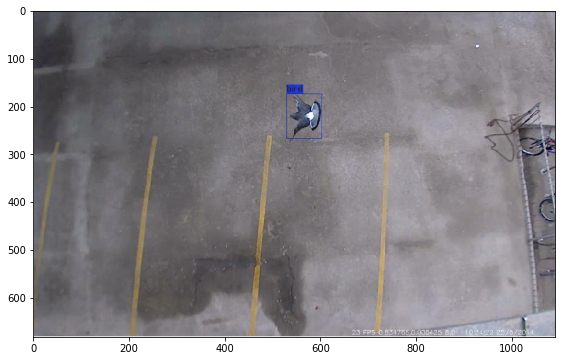

In [53]:
plt.figure(figsize=(13,6))
plt.imshow(imags[0][:,:,[2,1,0]])

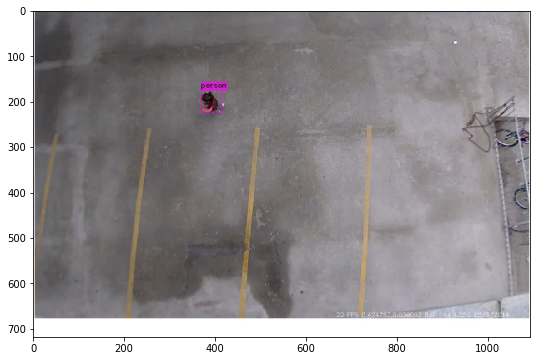

In [55]:
plt.figure(figsize=(13,6))
plt.imshow(imags[3][:,:,[2,1,0]])

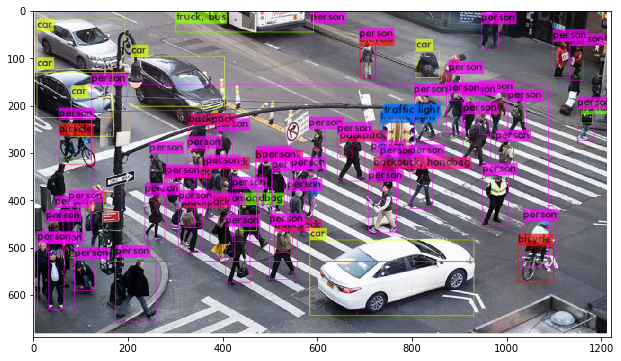

In [57]:
plt.figure(figsize=(13,6))
plt.imshow(imags[1][:,:,[2,1,0]])

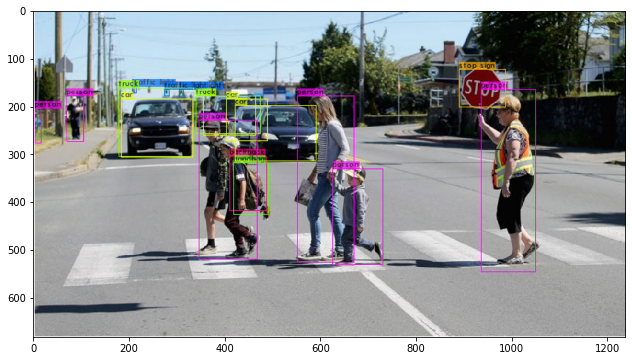

In [56]:
plt.figure(figsize=(13,6))
plt.imshow(imags[2][:,:,[2,1,0]])

3.

Primero se guardaran en un arreglo todas las detecciones que ocurrieron y en que frame, luego se colocara un contador con el fin de saber cuantas activaciones totales hubieron


In [13]:
#video a color

direct= 'C:/Users/aleja/Desktop/exp3/seq4/I_MC_01-'
ims_names = []
for i in range(300):
    ims_names.append(str(i+1)+'.bmp')
            
frame_width = 352
frame_height = 288
out = cv2.VideoWriter('seq4p5.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 20, 
                          (frame_width,frame_height),
                          isColor = True)
Activaciones=np.zeros(301)
contador=0    
for j in range(len(ims_names)-1):
    im1 = cv2.imread(direct + ims_names[j])
    im2 = cv2.imread(direct + ims_names[j+1])
    diff2 = cv2.absdiff(im1, im2)
    gray2 = cv2.cvtColor(diff2, cv2.COLOR_BGR2GRAY)
    blur2 = cv2.GaussianBlur(gray2, (5,5), 0)
    _, thresh2 = cv2.threshold(blur2, 20, 255, cv2.THRESH_BINARY)
    dilated2 = cv2.dilate(thresh2, None, iterations=3)
    _,contours, _ = cv2.findContours(dilated2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print(thresh2)
    #print(str(j+1)+', ', end='')    
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)

        if cv2.contourArea(contour) < 500:
            continue
        cv2.rectangle(im1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(im1, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 255), 3)
        Activaciones[j+1]=Activaciones[j+1]+1
        contador+=1
    image = cv2.resize(im1, (352,288))
    out.write(image)
    #cv2.imshow("feed", im1)
    #im1 = im2
    #ret, im2 = cap.read()

        
out.release()

Como se logró apreciar, adicionalmente se imprimió en pantalla el numero de frames y cada vez que existia una detección. Posteriormente se obtuvo que el total de veces que se detecto movimiento fue:

In [14]:
contador


313


Lo cual es demasiado, puesto que al observar el video, se logran apreciar muchos errores producidos por el movimiento de camara, siendo detecciones falsas.

Text(0, 0.5, 'Cantidad de detecciones')

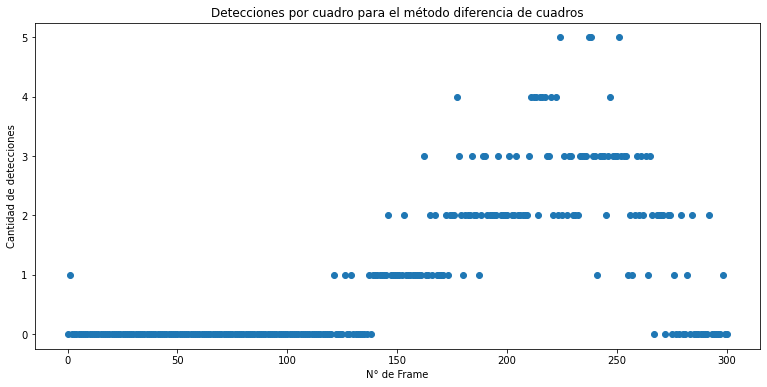

In [48]:
plt.figure(figsize=(13,6))
plt.plot(Activaciones,'o')
plt.title('Detecciones por cuadro para el método diferencia de cuadros')
plt.xlabel('N° de Frame')
plt.ylabel('Cantidad de detecciones')


Posteriormente para analizar los datos obtenidos mediante deep learning, se extrae en archivo resulst.txt, donde mustra todas las detecciones.

In [3]:
import pandas as pd
data=pd.read_csv(r'C:\Users\aleja\Desktop\exp3\results.txt',names=['Frame','Act','N1','N2','N3','N4','N5','N6','N7','N8'])

In [4]:
data.head()


,Frame,Act,N1,N2,N3,N4,N5,N6,N7,N8
0,145,1,299,55,52,226,-1,-1,-1,-1
1,146,1,296,33,55,251,-1,-1,-1,-1
2,147,1,297,41,54,240,-1,-1,-1,-1
3,148,1,300,49,51,227,-1,-1,-1,-1
4,149,1,300,49,51,230,-1,-1,-1,-1


In [5]:
len(data)


119

De inmediato se apreciaron muchas menos activaciones, siendo para este caso 119, puesto que como se logro ver en el video solo detecta a la persona y no ocurren errores como con el método anterior

In [8]:
modelodl=np.zeros(301)
modelodl[data['Frame']]=1

Text(0, 0.5, 'Cantidad de detecciones')

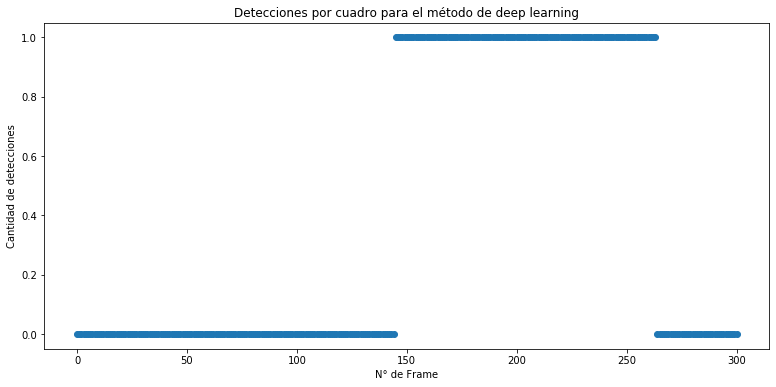

In [9]:
plt.figure(figsize=(13,6))
plt.plot(modelodl,'o')
plt.title('Detecciones por cuadro para el método de deep learning')
plt.xlabel('N° de Frame')
plt.ylabel('Cantidad de detecciones')

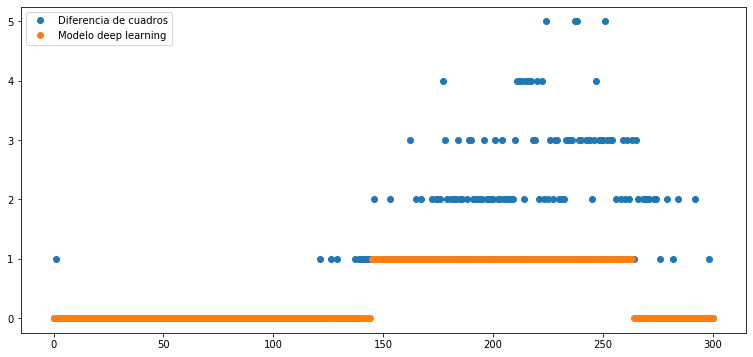

In [15]:
plt.figure(figsize=(13,6))
plt.plot(Activaciones,'o',label='Diferencia de cuadros')
plt.plot(modelodl,'o',label='Modelo deep learning')
plt.legend(loc='upper left')

<function matplotlib.pyplot.show(*args, **kw)>

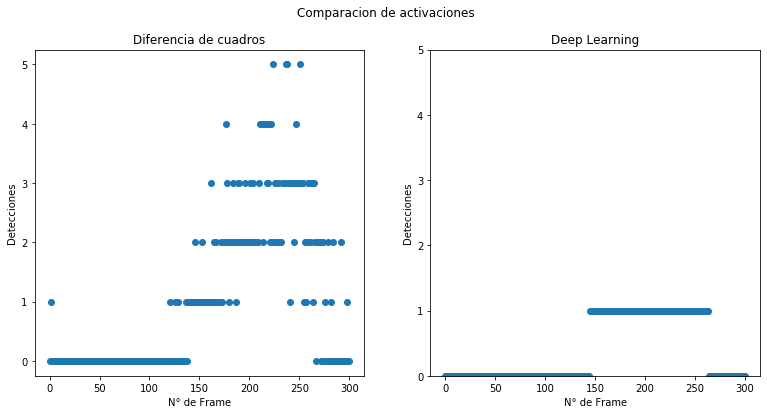

In [16]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,6))

fig.suptitle('Comparacion de activaciones')

ax2.plot(modelodl,'o')
ax1.plot(Activaciones,'o')
ax2.set_ylim(0,5)
ax2.set_title('Deep Learning')
ax1.set_title('Diferencia de cuadros')
ax1.set_xlabel('N° de Frame')
ax1.set_ylabel('Detecciones')
ax2.set_xlabel('N° de Frame')
ax2.set_ylabel('Detecciones')
plt.show

Donde se llegó a apreciar como el modelo de deep learning fue mucho mas preciso, logrando detectar a la persona y no falsos positivos como el modelo de diferencia de cuadros, llegandose a activar como maximo 1 vez por frame, teniendo un total de 119 detecciones pudiendo ser utilizado como solución para el porblema del movimiento de camara. En cambio el otro modelo llego a tener 313 detecciones, siendo muchas de estas falsas, con lo cual no funciona como solución al problema del movimiento de camara.